# Модуль 1. Цифровое изображение


В этом примере мы создадим функции для добавления различных видов шума к изображению, а затем применим фильтр свёртки для шумоподавления.


[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


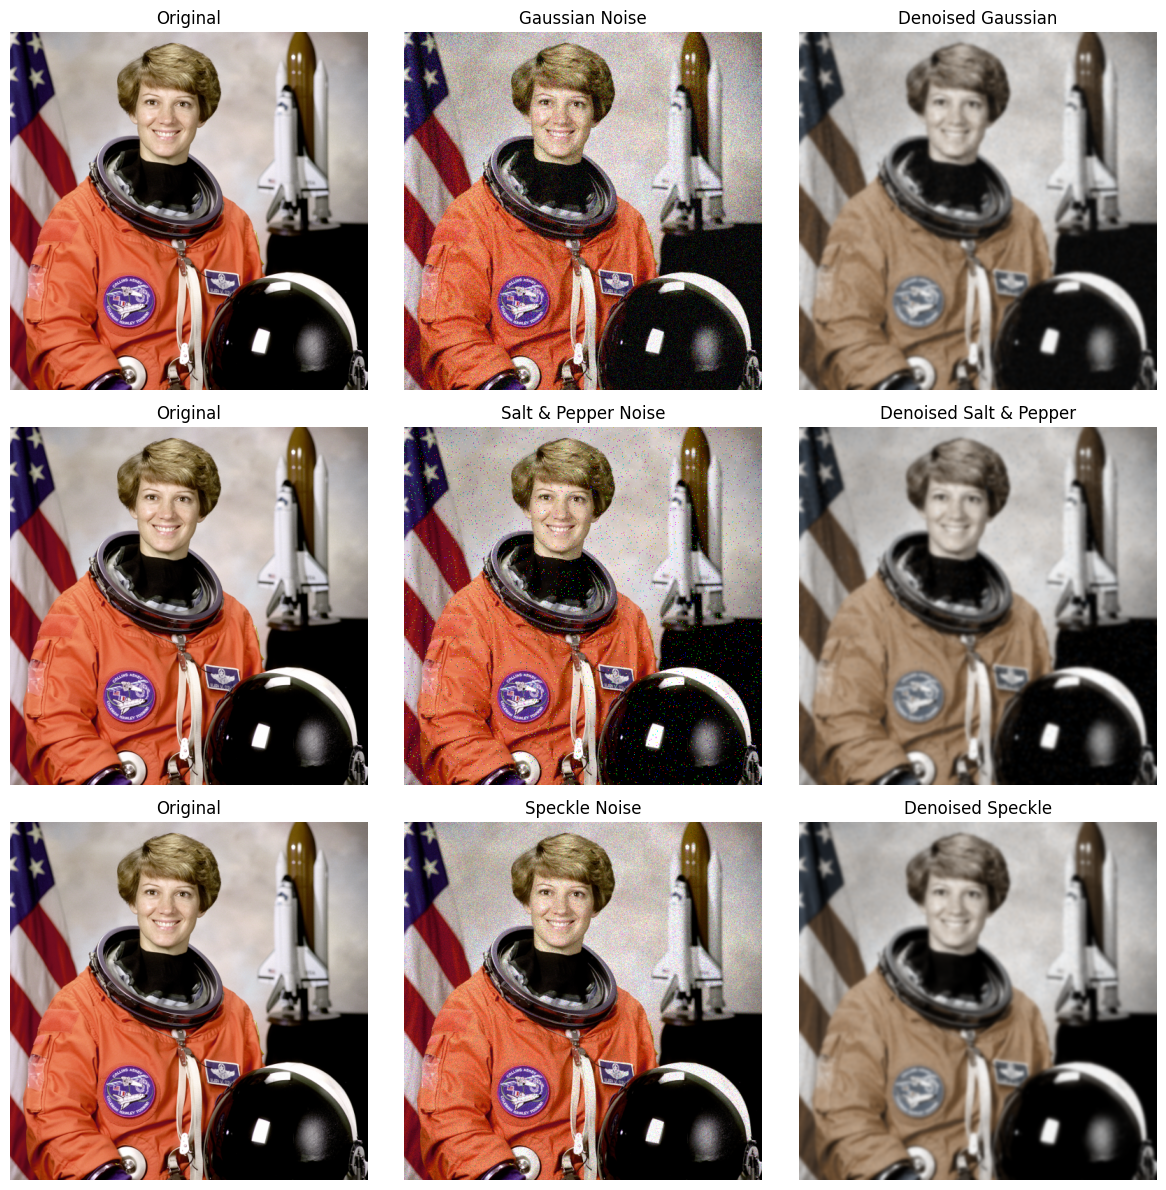

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.filters import gaussian
from skimage.util import random_noise



# Загрузка изображения
image = img_as_float(data.astronaut())
print(data.camera())

# Функция для добавления шума
def add_noise(image, noise_type="gaussian"):
    if noise_type == "gaussian":
        noisy_image = random_noise(image, mode="gaussian", var=0.01)
    elif noise_type == "salt_pepper":
        noisy_image = random_noise(image, mode="s&p", salt_vs_pepper=0.5, amount=0.02)
    elif noise_type == "speckle":
        noisy_image = random_noise(image, mode="speckle", mean=0, var=0.01)
    else:
        raise ValueError("Unsupported noise type: {}".format(noise_type))
    return noisy_image


# Функция для демонстрации шумоподавления
def denoise_image(image, sigma=1):
    return gaussian(image, sigma=sigma)


# Добавление различных видов шума
noisy_gaussian = add_noise(image, "gaussian")
noisy_salt_pepper = add_noise(image, "salt_pepper")
noisy_speckle = add_noise(image, "speckle")

# Применение шумоподавления
denoised_gaussian = denoise_image(noisy_gaussian, sigma=2)
denoised_salt_pepper = denoise_image(noisy_salt_pepper, sigma=2)
denoised_speckle = denoise_image(noisy_speckle, sigma=2)

# Отображение изображений
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for ax, img, title in zip(
    axes.flat,
    [image, noisy_gaussian, denoised_gaussian, image, noisy_salt_pepper, denoised_salt_pepper, image, noisy_speckle, denoised_speckle],
    ["Original", "Gaussian Noise", "Denoised Gaussian", "Original", "Salt & Pepper Noise", "Denoised Salt & Pepper", "Original", "Speckle Noise", "Denoised Speckle"],
):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

Метод усреднения нескольких кадров является эффективным способом шумоподавления, особенно когда шум является случайным от кадра к кадру. Этот метод заключается в том, что несколько снимков одного и того же объекта усредняются, что позволяет уменьшить влияние случайного шума, так как шум имеет тенденцию нейтрализоваться, в то время как полезный сигнал усиливается.

Для демонстрации этого метода на Python, давайте создадим пример, где мы сгенерируем несколько шумных кадров одного и того же изображения и затем усредним их для уменьшения шума.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import random_noise

# Загрузка оригинального изображения
original_image = img_as_float(data.astronaut())


# Функция для добавления гауссового шума к изображению
def add_gaussian_noise(image, mean=0, var=0.01):
    return random_noise(image, mode="gaussian", mean=mean, var=var)


# Генерация нескольких шумных кадров
n_frames = 10
noisy_frames = [add_gaussian_noise(original_image) for _ in range(n_frames)]

# Усреднение кадров
average_frame = np.mean(noisy_frames, axis=0)

# Отображение результатов
print(data.camera())
ax[0].imshow(original_image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_frames[0], cmap="gray")
ax[1].set_title("One Noisy Frame")
ax[1].axis("off")

ax[2].imshow(average_frame, cmap="gray")
ax[2].set_title("Averaged Frame")
ax[2].axis("off")

plt.tight_layout()
plt.show()

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


TypeError: 'Axes' object is not subscriptable

Метод пространственной фильтрации использует пространственные фильтры для уменьшения шума или для выделения определённых характеристик изображения, таких как границы или текстура. Одним из простейших примеров пространственной фильтрации является использование сглаживающего (усредняющего) фильтра, который заменяет значение каждого пикселя средним значением из его окрестности, уменьшая тем самым шум на изображении.

Для иллюстрации метода пространственной фильтрации создадим пример на Python, где мы применим как сглаживающий фильтр, так и фильтр Собеля для выделения границ объектов на изображении.


/home/student/Документы/MORI/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


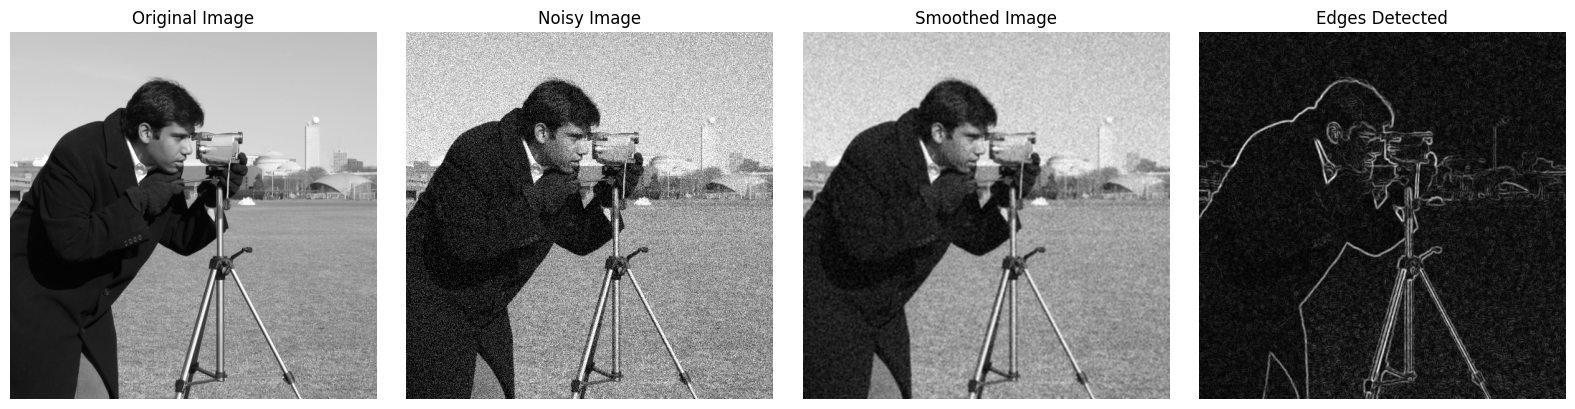

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_float
from skimage.util import random_noise

# Загрузка и подготовка изображения
image = img_as_float(data.camera())
noisy_image = random_noise(image, mode="gaussian", var=0.01)

# Применение сглаживающего фильтра
smoothed_image = filters.rank.mean(noisy_image, np.ones((3, 3)))

# Применение фильтра Собеля для выделения границ
edges = filters.sobel(smoothed_image)

# Отображение результатов
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap="gray")
axes[1].set_title("Noisy Image")
axes[1].axis("off")

axes[2].imshow(smoothed_image, cmap="gray")
axes[2].set_title("Smoothed Image")
axes[2].axis("off")

axes[3].imshow(edges, cmap="gray")
axes[3].set_title("Edges Detected")
axes[3].axis("off")

plt.tight_layout()
plt.show()

Временная фильтрация применяется в видеообработке для уменьшения шума или других временных артефактов, влияющих на последовательность кадров. Этот метод полагается на анализ изменений между последовательными кадрами для улучшения качества видео. В качестве примера, давайте рассмотрим простую временную фильтрацию, которая усредняет соответствующие пиксели по нескольким последовательным кадрам для уменьшения шума.

Представим, что у нас есть последовательность из
�
N кадров видео, и мы хотим уменьшить шум, усреднив каждый пиксель по этим кадрам. В этом примере для демонстрации мы сгенерируем искусственную последовательность кадров с шумом, добавив случайный шум к одному и тому же изображению.


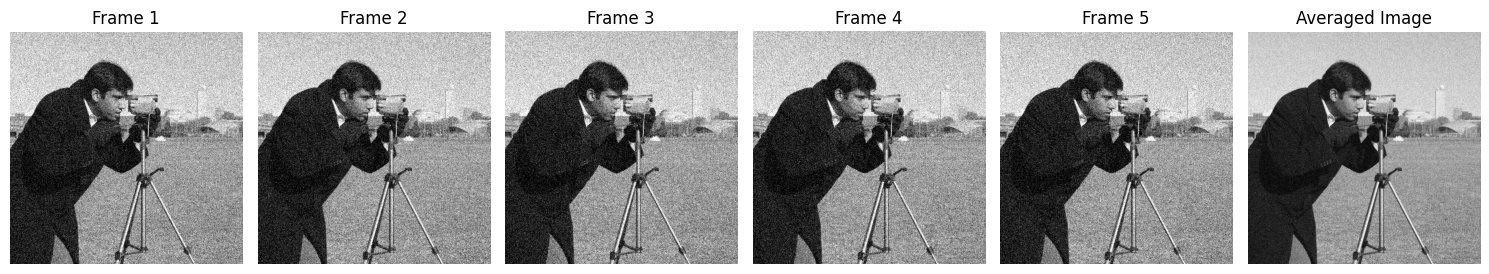

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import random_noise

# Загрузка оригинального изображения
original_image = img_as_float(data.camera())

# Создание искусственной последовательности кадров с шумом
num_frames = 5
noisy_frames = [random_noise(original_image, mode="gaussian", var=0.02) for _ in range(num_frames)]

# Временная фильтрация: усреднение по кадрам
average_image = np.mean(noisy_frames, axis=0)

# Отображение результатов
fig, axes = plt.subplots(1, num_frames + 1, figsize=(15, 3), sharex=True, sharey=True)
for i, frame in enumerate(noisy_frames):
    axes[i].imshow(frame, cmap="gray")
    axes[i].set_title(f"Frame {i+1}")
    axes[i].axis("off")

# Отображение усреднённого изображения
axes[-1].imshow(average_image, cmap="gray")
axes[-1].set_title("Averaged Image")
axes[-1].axis("off")

plt.tight_layout()
plt.show()

## Свёртка и корреляция.


### Свёртка

Для демонстрации свёртки, применим гауссовский сглаживающий фильтр к изображению. Гауссовский фильтр помогает уменьшить шум, сохраняя при этом края объектов


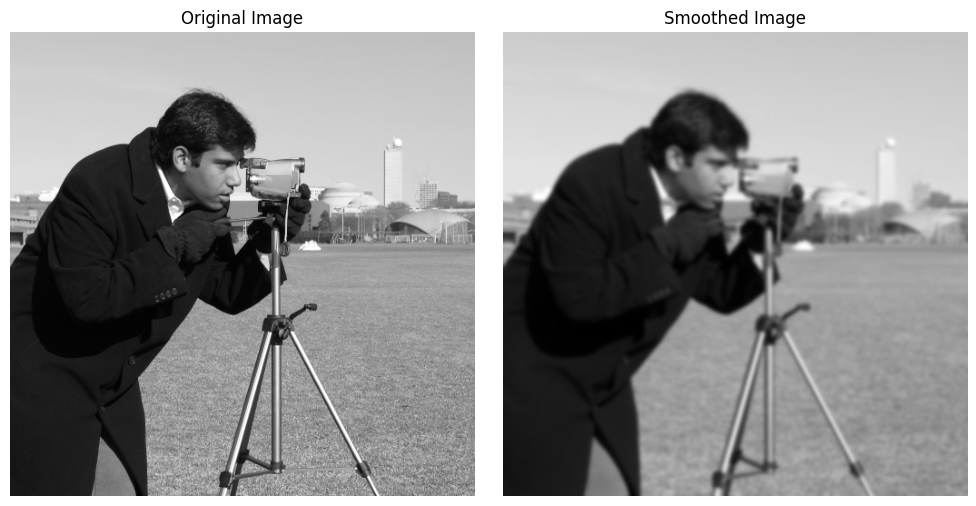

In [6]:
from skimage import data, img_as_float
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Загрузка изображения
image = img_as_float(data.camera())

# Применение гауссовской свёртки
sigma = 2  # Стандартное отклонение для Гауссова ядра
smoothed_image = gaussian_filter(image, sigma=sigma)

# Отображение результатов
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(smoothed_image, cmap="gray")
ax[1].set_title("Smoothed Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()

### Корреляция

Пример корреляции может включать поиск конкретного шаблона на изображении. Для простоты демонстрации используем функцию match_template из библиотеки skimage, чтобы найти местоположение маленького фрагмента в большом изображении.


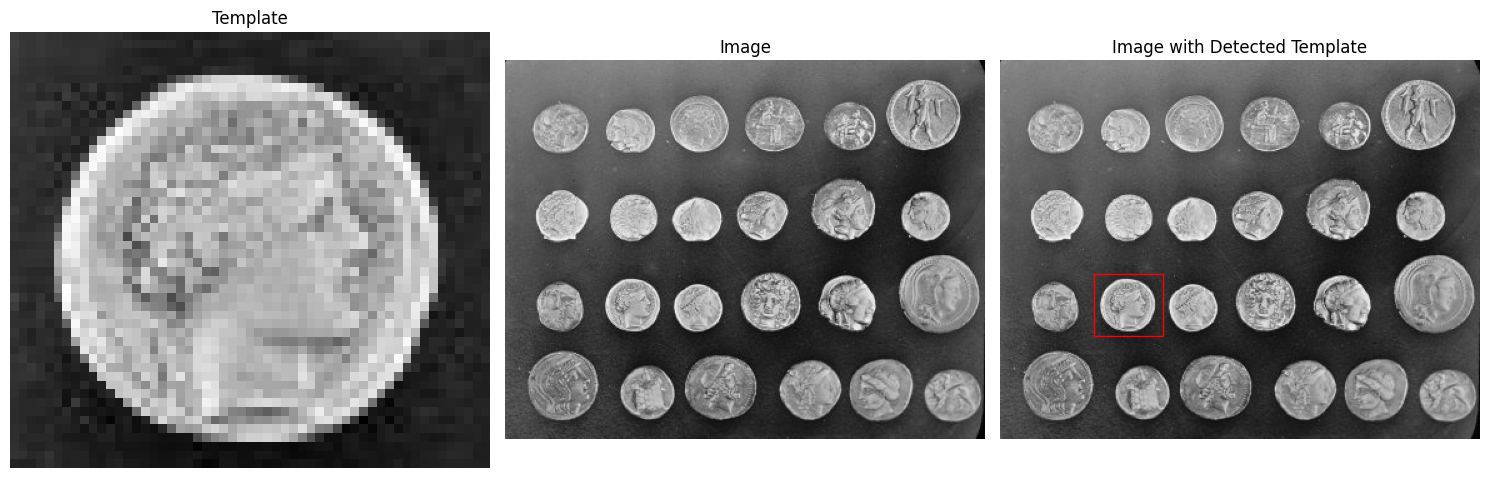

In [7]:
from skimage import data
from skimage.feature import match_template
import matplotlib.pyplot as plt

# Загрузка изображения и выбор шаблона
image = data.coins()
template = image[170:220, 75:130]  # Выбор части изображения как шаблон

# Поиск шаблона на изображении
result = match_template(image, template)

# Определение местоположения шаблона
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(template, cmap="gray")
ax[0].set_title("Template")
ax[0].axis("off")

ax[1].imshow(image, cmap="gray")
ax[1].set_title("Image")
ax[1].axis("off")

# Показать обнаруженный шаблон на изображении
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor="r", facecolor="none")
ax[2].add_patch(rect)
ax[2].imshow(image, cmap="gray")
ax[2].set_title("Image with Detected Template")
ax[2].axis("off")

plt.tight_layout()
plt.show()

В этих примерах мы видим, как свёртка применяется для сглаживания изображения, а корреляция используется для поиска шаблона на изображении. Эти методы являются основными инструментами в обработке изображений и могут быть адаптированы и расширены для решения разнообразных задач.


### Линейные фильтры и свёртка

Линейный фильтр работает, перемещаясь по всему изображению и применяя ядро (или маску) свёртки к каждому пикселю. Это ядро определяет, как взвешиваются значения пикселей в окрестности обрабатываемого пикселя. Простым примером линейного фильтра является усредняющий фильтр, где каждое значение пикселя заменяется средним значением из его окрестности.

#### Пример: Усредняющий фильтр

Давайте создадим усредняющий фильтр и применим его к изображению, чтобы уменьшить шум.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data, img_as_float
from skimage.util import random_noise

# Загрузка и подготовка изображения
image = img_as_float(data.camera())
noisy_image = random_noise(image, mode="gaussian", var=0.01)

# Определение ядра усредняющего фильтра
kernel_size = 3  # Размер 3x3
kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

# Применение свёртки с усредняющим фильтром
smoothed_image = convolve(noisy_image, kernel)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image, cmap="gray")
ax[2].set_title("Smoothed Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()

В этом примере:

- Сначала загружается исходное изображение и добавляется к нему гауссовский шум.
- Затем определяется ядро усредняющего фильтра размером 3x3. Каждый элемент ядра имеет значение 1/9, что обеспечивает усреднение значений пикселей в окрестности каждого пикселя при применении фильтра.
- После этого применяется свёртка с усредняющим фильтром к зашумленному изображению, что позволяет сгладить изображение и уменьшить шум.
- В конце результаты отображаются для сравнения: исходное изображение, зашумленное изображение и изображение после применения усредняющего фильтра.

Этот подход позволяет наглядно продемонстрировать, как линейные фильтры и свёртка могут использоваться для уменьшения шума на изображениях, сохраняя при этом общую структуру и детали изображения.


### Свертка

Для демонстрации примера свёртки на изображении с использованием Python, мы воспользуемся библиотекой scipy и её функцией convolve из модуля ndimage. В этом примере мы создадим простой фильтр для выделения границ на изображении. Это поможет понять, как свёртка может использоваться для выявления структурных особенностей изображения, таких как границы объектов.

#### Пример: Фильтр для выделения границ


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data, img_as_float

# Загрузка изображения
image = img_as_float(data.camera())

# Определение ядра свёртки для выделения границ
# Это пример простого горизонтального фильтра Собеля
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Применение свёртки
edges = convolve(image, kernel)

# Отображение результатов
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Edges Detected")
ax[1].axis("off")

plt.tight_layout()
plt.show()

Для демонстрации использования свёртки для шумоподавления на изображении, мы применим гауссовский фильтр. Гауссовский фильтр является одним из наиболее распространённых линейных фильтров для сглаживания изображений, позволяя эффективно уменьшать шум за счёт размытия изображения. Этот фильтр использует ядро свёртки, веса которого определяются гауссовым распределением, что обеспечивает мягкое сглаживание переходов интенсивности.

#### Пример: Гауссовское сглаживание

В этом примере мы воспользуемся функцией gaussian_filter из модуля scipy.ndimage, которая позволяет применять гауссовскую свёртку к изображению.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import data, img_as_float
from skimage.util import random_noise

# Загрузка и подготовка изображения
image = img_as_float(data.camera())
# Добавление гауссовского шума к изображению
noisy_image = random_noise(image, mode="gaussian", var=0.01)

# Применение гауссовского фильтра для сглаживания
sigma = 2  # Параметр sigma контролирует степень размытия
smoothed_image = gaussian_filter(noisy_image, sigma=sigma)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image, cmap="gray")
ax[2].set_title("Smoothed with Gaussian Filter")
ax[2].axis("off")

plt.tight_layout()
plt.show()

В предыдущем примере с использованием гауссовского фильтра для шумоподавления, свёртка используется неявно внутри функции gaussian_filter из модуля scipy.ndimage. Свёртка — это математическая операция, применяемая к двум функциям (в контексте обработки изображений, одной из этих функций является изображение, а другой — ядро фильтра), для получения третьей функции, которая представляет собой модифицированную версию одной из исходных функций.

Когда мы говорим о применении гауссовского фильтра к изображению, мы имеем в виду, что каждый пиксель исходного изображения заменяется взвешенным средним его окрестности. Веса для этого среднего берутся из гауссовского ядра (или маски), которое применяется к изображению через операцию свёртки. Это означает, что значение каждого пикселя в выходном изображении вычисляется как сумма произведений значений пикселей в окрестности входного пикселя на соответствующие веса в ядре фильтра.

Давайте разъясним это на более низком уровне, применив свёртку явно без использования готовой функции gaussian_filter, чтобы лучше понять, как работает этот процесс.

#### Пример: Применение свёртки с использованием явного ядра гауссовского фильтра

Для демонстрации явной свёртки создадим гауссовское ядро вручную и применим его к изображению с использованием функции convolve из scipy.ndimage.


In [ ]:
from scipy.ndimage import convolve
import numpy as np


# Функция для создания гауссовского ядра
def gaussian_kernel(size, sigma=1.0):
    size = int(size) // 2
    x, y = np.mgrid[-size : size + 1, -size : size + 1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return g / g.sum()


# Создание гауссовского ядра
kernel = gaussian_kernel(5, sigma=2)

# Применение свёртки с гауссовским ядром к зашумлённому изображению
smoothed_image_explicit = convolve(noisy_image, kernel)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image_explicit, cmap="gray")
ax[2].set_title("Smoothed with Gaussian Filter")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Компенсация разности освещения

Компенсация разности освещения на изображениях — это важный шаг в обработке изображений, который помогает улучшить качество изображения, делая его более равномерно освещённым. Это особенно полезно в задачах компьютерного зрения и анализа изображений, где неоднородное освещение может затруднить обнаружение объектов или выделение признаков. Один из подходов к компенсации разности освещения — это применение гомоморфного фильтра, который работает в частотной области и улучшает видимость деталей в теневых областях, сохраняя при этом детали в ярких областях.

Однако, для простоты, мы рассмотрим другой подход, который может быть выполнен напрямую в пространственной области и не требует преобразования Фурье. Этот подход включает вычитание "фона" освещения, полученного с помощью гауссовского размытия, и последующую нормализацию изображения.

### Пример: Компенсация разности освещения с помощью гауссовского размытия

Этот подход позволяет улучшить видимость деталей на изображении, компенсируя неоднородное освещение, и может быть полезен в различных приложениях обработки изображений.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import gaussian_filter

# Загрузка изображения
image = img_as_float(data.camera())

# Применение гауссовского размытия для имитации "фона" освещения
sigma = 50  # Большое значение sigma для получения широкого размытия
background = gaussian_filter(image, sigma=sigma)

# Компенсация разности освещения
compensated_image = image - background + 1  # +1 для сохранения положительного диапазона

# Клиппинг значений для ограничения их в пределах [0, 1]
compensated_image = np.clip(compensated_image, 0, 1)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(background, cmap="gray")
ax[1].set_title("Estimated Background Lighting")
ax[1].axis("off")

ax[2].imshow(compensated_image, cmap="gray")
ax[2].set_title("Compensated Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Медианный фильтр

Медианный фильтр — это нелинейный цифровой фильтрующий инструмент, часто используемый для уменьшения шума на изображении или сигнале. Основная идея медианного фильтра заключается в замене каждого значения пикселя медианой значений в его окрестности. Это позволяет сохранить резкие края, удаляя при этом шум, особенно полезно для устранения так называемого "соль и перец" шума.

Медианный фильтр эффективно устраняет шум "соль и перец", при этом сохраняя границы объектов на изображении относительно чёткими, что делает его предпочтительным выбором для многих приложений в области обработки изображений.

# Пример: Применение медианного фильтра к изображению

В следующем примере мы используем библиотеку scikit-image для демонстрации применения медианного фильтра к изображению с шумом "соль и перец".


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, util
from skimage.filters import median
from skimage.morphology import disk

# Загрузка изображения
image = data.camera()

# Добавление шума "соль и перец"
noisy_image = util.random_noise(image, mode="s&p", amount=0.05)

# Применение медианного фильтра
# disk(1) определяет окрестность для медианного фильтра радиусом 1 пиксель
filtered_image = median(noisy_image, disk(1))

# Отображение результатов
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap="gray")
axes[1].set_title("Noisy Image")
axes[1].axis("off")

axes[2].imshow(filtered_image, cmap="gray")
axes[2].set_title("Filtered with Median Filter")
axes[2].axis("off")

plt.tight_layout()
plt.show()

## Алгоритм Single scale retinex (SSR)

Алгоритм Single Scale Retinex (SSR) используется для улучшения визуализации изображений путём моделирования процесса восприятия света человеческим глазом. SSR улучшает контраст и цветовое восприятие, делая изображения более яркими и детализированными, особенно в условиях плохого освещения.

Алгоритм SSR основан на операции логарифмического вычитания между исходным изображением и его версией, обработанной с помощью гауссовского фильтра. Это позволяет уменьшить влияние освещения, выделяя основные характеристики изображения.

## Пример: Применение алгоритма SSR к изображению

Для демонстрации SSR применим его к стандартному изображению, используя Python и библиотеки numpy и scipy.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import gaussian_filter

# Загрузка и нормализация изображения
image = img_as_float(data.camera())

# Применение гауссовского фильтра для симуляции освещённой сцены
sigma = 30  # Размер ядра гауссовского фильтра
illuminated = gaussian_filter(image, sigma=sigma)

# Применение алгоритма SSR
ssr_image = np.log10(image + 1e-6) - np.log10(illuminated + 1e-6)

# Нормализация результата для отображения
ssr_image = (ssr_image - ssr_image.min()) / (ssr_image.max() - ssr_image.min())

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(illuminated, cmap="gray")
ax[1].set_title("Illuminated with Gaussian Filter")
ax[1].axis("off")

ax[2].imshow(ssr_image, cmap="gray")
ax[2].set_title("SSR Result")
ax[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, color
from scipy.ndimage import gaussian_filter

# Загрузка и нормализация цветного изображения
image = img_as_float(data.chelsea())
# Преобразование в градации серого для упрощения
image_gray = color.rgb2gray(image)

# Применение гауссовского фильтра для симуляции освещённой сцены
sigma = 30
illuminated = gaussian_filter(image_gray, sigma=sigma)

# Применение алгоритма SSR
ssr_image = np.log10(image_gray + 1e-6) - np.log10(illuminated + 1e-6)

# Нормализация результата для отображения
ssr_image = (ssr_image - ssr_image.min()) / (ssr_image.max() - ssr_image.min())

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image_gray, cmap="gray")
ax[0].set_title("Original Image (Gray)")
ax[0].axis("off")

ax[1].imshow(illuminated, cmap="gray")
ax[1].set_title("Illuminated with Gaussian Filter")
ax[1].axis("off")

ax[2].imshow(ssr_image, cmap="gray")
ax[2].set_title("SSR Result")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Билатеральный фильтр

Билатеральный фильтр — это нелинейный метод сглаживания изображений, который эффективно уменьшает шум, сохраняя при этом резкие края. В отличие от традиционных фильтров, которые используют только пространственное расстояние для сглаживания, билатеральный фильтр также учитывает разницу в интенсивности между пикселями, что позволяет ему сохранять границы объектов на изображении при уменьшении шума.

### Пример: Применение билатерального фильтра к изображению

Для демонстрации применения билатерального фильтра воспользуемся функцией bilateral_filter из библиотеки scikit-image. Если эта функция недоступна напрямую, мы можем использовать denoise_bilateral из модуля skimage.restoration.


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_bilateral

# Загрузка изображения
image = img_as_float(data.chelsea())
# Добавление гауссовского шума к изображению
noisy_image = util.random_noise(image, mode="gaussian", var=0.01)

# Применение билатерального фильтра
filtered_image = denoise_bilateral(noisy_image, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image)
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(filtered_image)
ax[2].set_title("Filtered with Bilateral Filter")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Сглаживание с box-фильтром.

Сглаживание с использованием box-фильтра, также известного как усредняющий фильтр, представляет собой простой метод сглаживания изображения. Этот фильтр заменяет значение каждого пикселя средним значением пикселей в его окрестности, определённой размером ядра фильтра. Box-фильтр полезен для уменьшения шума на изображении, но может размывать границы.

### Пример: Сглаживание с box-фильтром

Для демонстрации применения box-фильтра к изображению, мы воспользуемся функцией filter из библиотеки scipy.ndimage. Если вам нужен более специализированный инструмент для box-фильтра, можно использовать uniform_filter.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import uniform_filter

# Загрузка и нормализация изображения
image = img_as_float(data.camera())

# Добавление гауссовского шума для имитации зашумленного изображения
noisy_image = image + 0.1 * np.random.standard_normal(image.shape)

# Применение box-фильтра (усредняющего фильтра)
# Размер ядра фильтра 3x3
smoothed_image = uniform_filter(noisy_image, size=3)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image, cmap="gray")
ax[2].set_title("Smoothed with Box Filter")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Статистические свойства распределения градиентов в изображении

Статистические свойства распределения градиентов в изображении могут использоваться для выделения краёв и границ. Градиент изображения показывает, как быстро изменяется интенсивность пикселей, и направление этого изменения. Выделение краёв на изображении обычно включает вычисление градиента изображения и поиск мест, где градиент достигает локальных максимумов, что указывает на наличие края.

Один из наиболее известных операторов для вычисления градиента — оператор Собеля, который использует два ядра свёртки: одно для вычисления градиента по горизонтали (X) и другое для градиента по вертикали (Y). Комбинация этих двух градиентов может быть использована для вычисления величины градиента и направления в каждой точке изображения.

Выделение краёв с помощью градиентов позволяет обнаружить значимые перепады интенсивности на изображении, что часто соответствует краям объектов. Этот метод широко применяется в обработке изображений и компьютерном зрении для различных задач, включая сегментацию и распознавание объектов.

### Пример: Выделение краёв с помощью оператора Собеля


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import sobel

# Загрузка и нормализация изображения
image = img_as_float(data.camera())

# Вычисление градиента изображения
sobel_x = sobel(image, axis=0)  # Градиент по горизонтали
sobel_y = sobel(image, axis=1)  # Градиент по вертикали

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация для отображения
gradient_magnitude = (gradient_magnitude - gradient_magnitude.min()) / (gradient_magnitude.max() - gradient_magnitude.min())

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(gradient_magnitude, cmap="gray")
ax[1].set_title("Gradient Magnitude")
ax[1].axis("off")

# Вычисление и отображение направления градиента
gradient_direction = np.arctan2(sobel_y, sobel_x)
ax[2].imshow(gradient_direction, cmap="hsv")  # Использование цветовой карты HSV для визуализации направления
ax[2].set_title("Gradient Direction")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Дифференцирование и свёртка

Дифференцирование и свёртка тесно связаны в контексте обработки изображений. Дифференцирование помогает выявить изменения интенсивности (градиенты) в изображении, что полезно для выделения краёв и других важных структур. Свёртка, в свою очередь, позволяет применять различные фильтры к изображению, включая дифференцирующие фильтры, для вычисления производных по горизонтальной и вертикальной осям.

Пример: Применение дифференцирующего фильтра через свёртку
В этом примере мы будем использовать ядра свёртки для вычисления первой производной изображения в горизонтальном и вертикальном направлениях, что эквивалентно дифференцированию. Для демонстрации применим простые фильтры Собеля.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data, img_as_float

# Загрузка изображения
image = img_as_float(data.camera())

# Определение ядер свёртки для дифференцирования
# Ядро для вычисления производной по горизонтали (dx)
kernel_dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Ядро для вычисления производной по вертикали (dy)
kernel_dy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Применение свёртки с ядрами
dx = convolve(image, kernel_dx)
dy = convolve(image, kernel_dy)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(dx, cmap="gray")
ax[1].set_title("Derivative dx")
ax[1].axis("off")

ax[2].imshow(dy, cmap="gray")
ax[2].set_title("Derivative dy")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Производная фильтра Гаусса

Производная фильтра Гаусса является мощным инструментом в обработке изображений для выделения краёв и границ, а также для анализа текстур. Фильтр Гаусса сглаживает изображение, уменьшая шум, а его производная помогает выявить области с высокими пространственными изменениями интенсивности, то есть края. Производная фильтра Гаусса обеспечивает баланс между сглаживанием шума и локализацией краёв.

### Пример: Применение производной фильтра Гаусса для выделения краёв на изображении

В этом примере мы воспользуемся функцией gaussian_filter из scipy.ndimage, чтобы применить фильтр Гаусса к изображению, а затем вычислим градиенты изображения для выделения краёв.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude
from skimage import data, img_as_float

# Загрузка изображения
image = img_as_float(data.camera())

# Применение фильтра Гаусса
sigma = 1  # Значение sigma контролирует степень сглаживания
smoothed_image = gaussian_filter(image, sigma=sigma)

# Вычисление величины градиента изображения после применения фильтра Гаусса
gradient_magnitude = gaussian_gradient_magnitude(smoothed_image, sigma=sigma)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(smoothed_image, cmap="gray")
ax[1].set_title("Gaussian Filtered")
ax[1].axis("off")

ax[2].imshow(gradient_magnitude, cmap="gray")
ax[2].set_title("Gradient Magnitude")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Фильтры: Робертса, Превитт, Собель 3x3, Scharr, Собель 5x5

Для сравнения фильтров Робертса, Превитт, Собель 3x3, Scharr и Собель 5x5, мы применим каждый из этих фильтров к одному и тому же изображению. Это позволит наглядно оценить, как каждый фильтр выделяет края на изображении. Воспользуемся библиотекой scikit-image для демонстрации, так как она предоставляет удобные функции для применения этих фильтров.


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_float

# Загрузка и нормализация изображения
image = img_as_float(data.camera())

# Применение фильтров
edges_roberts = filters.roberts(image)
edges_prewitt = filters.prewitt(image)
edges_sobel = filters.sobel(image)
edges_scharr = filters.scharr(image)

# Отображение результатов
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(edges_roberts, cmap="gray")
ax[0].set_title("Roberts")

ax[1].imshow(edges_prewitt, cmap="gray")
ax[1].set_title("Prewitt")

ax[2].imshow(edges_sobel, cmap="gray")
ax[2].set_title("Sobel 3x3")

ax[3].imshow(edges_scharr, cmap="gray")
ax[3].set_title("Scharr")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

В этом примере мы видим, как различные фильтры выделяют края на изображении. Каждый фильтр имеет свои особенности:

- Робертс — выделяет края с высокой чувствительностью к шуму.
- Превитт — предоставляет более мягкое выделение краёв по сравнению с Робертсом.
- Собель 3x3 — обеспечивает хороший баланс между чувствительностью к краям и устойчивостью к шуму.
- Scharr — аналогичен Собелю, но с весами, оптимизированными для лучшего выделения краёв.
- Собель 5x5 (приближённо) — предполагает более широкое окно, что может привести к лучшему сглаживанию и выделению краёв, однако в scikit-image нет прямой реализации для ядра 5x5, и использование mask=np.ones((5, 5)) с функцией Собеля является приближенным методом для демонстрации возможного эффекта.


## Сегментация объектов

Сегментация объектов на изображении — это процесс разделения изображения на части, которые представляют собой различные объекты или области интереса. Это ключевой шаг в многих задачах обработки изображений и компьютерного зрения, включая медицинскую визуализацию, анализ сцен и распознавание объектов. Существует множество методов сегментации, от простых пороговых методов до сложных алгоритмов, основанных на машинном обучении. В этом примере мы рассмотрим два подхода: пороговую сегментацию и сегментацию с использованием алгоритма водораздела.

### Пример 1: Пороговая сегментация

Пороговая сегментация — это простой и часто эффективный метод для разделения объектов от фона. Она работает путём выбора порога интенсивности, при котором пиксели изображения классифицируются либо как принадлежащие объектам, либо как фон.


In [ ]:
from skimage import data, filters
import matplotlib.pyplot as plt

# Загрузка изображения
image = data.coins()

# Применение глобальной пороговой фильтрации
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Отображение результатов
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(binary, cmap="gray")
ax[1].set_title("Threshold Segmentation")
ax[1].axis("off")

plt.show()

### Пример 2: Сегментация методом водораздела

Метод водораздела часто используется для более сложной сегментации, особенно когда объекты на изображении соприкасаются или перекрывают друг друга. Он работает путём моделирования изображения как ландшафта, где яркие области представляют "высоты", а темные области — "низины".

Эти два примера иллюстрируют, как можно использовать пороговую сегментацию и сегментацию методом водораздела для разделения объектов на изображении от фона. Выбор метода зависит от конкретной задачи, характеристик изображения и требуемой точности сегментации.


In [ ]:
from skimage import data, color, measure, morphology
from skimage.filters import sobel
from skimage.segmentation import watershed
import matplotlib.pyplot as plt

# Загрузка и преобразование изображения
image = data.coins()
edges = sobel(image)

# Нахождение маркеров для водораздела
markers = np.zeros_like(image)
foreground, background = 1, 2
markers[image < 30] = background
markers[image > 150] = foreground

# Применение водораздела
segmentation = watershed(edges, markers)
segmentation = morphology.dilation(segmentation - 1, morphology.disk(3))

# Отображение результатов
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(color.label2rgb(segmentation, image=image))
ax[0].set_title("Watershed Segmentation")
ax[0].axis("off")

ax[1].imshow(image, cmap="gray")
ax[1].set_title("Original Image")
ax[1].axis("off")

plt.show()

## Текстура изображения

Анализ текстуры изображения — это процесс изучения структурных аспектов, которые определяют визуальные характеристики поверхностей и объектов на изображении. Текстура может описывать повторяющиеся паттерны, гладкость, шероховатость и другие визуальные качества, которые помогают в идентификации объектов или регионов изображения. В анализе текстуры часто используются такие методы, как матрица совместного встречаемости уровней серого (GLCM) и локальные бинарные паттерны (LBP).

### Пример: Анализ текстуры с использованием GLCM

GLCM — это метод анализа текстуры, который рассматривает распределение пар значений интенсивности на определённом расстоянии и направлении в изображении. Из GLCM можно извлечь несколько статистических мер, таких как контраст, однородность, энергия и корреляция, которые описывают текстуру изображения.


In [ ]:
from skimage import data, img_as_ubyte
from skimage.color import rgb2gray
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt

# Загрузка и нормализация цветного изображения
image = img_as_float(data.chelsea())
# Преобразование в градации серого для упрощения
image_gray = color.rgb2gray(image)
image_gray = img_as_ubyte(image_gray)  # Преобразование в 8-битное изображение

# Вычисление GLCM
glcm = graycomatrix(image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Вычисление свойств из GLCM
contrast = graycoprops(glcm, "contrast")
dissimilarity = graycoprops(glcm, "dissimilarity")
homogeneity = graycoprops(glcm, "homogeneity")
energy = graycoprops(glcm, "energy")
correlation = graycoprops(glcm, "correlation")

# Вывод результатов
print(f"Contrast: {contrast[0, 0]}")
print(f"Dissimilarity: {dissimilarity[0, 0]}")
print(f"Homogeneity: {homogeneity[0, 0]}")
print(f"Energy: {energy[0, 0]}")
print(f"Correlation: {correlation[0, 0]}")

# Отображение изображения
plt.imshow(image_gray, cmap="gray")
plt.title("Gray Image")
plt.axis("off")
plt.show()

## Источника текстур

Для задач классификации текстур одним из хорошо известных и часто используемых наборов данных является набор данных "Outex", который содержит изображения с разнообразными текстурами. Он широко используется в исследованиях по анализу и классификации текстур. Набор данных содержит изображения различных поверхностей и материалов, что делает его подходящим для тестирования алгоритмов выделения текстур и классификации.

Кроме того, существует набор данных "DTD" (Describable Textures Dataset), который также часто используется для задач, связанных с текстурой. DTD включает в себя изображения с описательными атрибутами, что позволяет не только классифицировать текстуры, но и проводить более глубокий семантический анализ.

### Outex

**Сайт**: http://www.outex.oulu.fi/

**Описание**: Набор данных Outex содержит большое количество изображений текстур в различных условиях освещения и вращения, что делает его подходящим для задач, где требуется устойчивость классификатора к изменениям условий наблюдения.

### DTD (Describable Textures Dataset)

**Сайт**: https://www.robots.ox.ac.uk/~vgg/data/dtd/index.html

**Описание**: DTD — это коллекция изображений текстур с аннотациями, описывающими их визуальные свойства естественным языком. Он содержит более 5000 изображений, разделённых на 47 категорий.

### Использование в проекте

Для использования этих наборов данных в проекте по классификации текстур сначала необходимо скачать данные с официального сайта или соответствующего репозитория. Затем данные можно загрузить в вашу среду разработки и предобработать, например, преобразовав в градации серого, нормализовав и извлекая текстурные признаки, такие как GLCM. После извлечения признаков можно применить алгоритмы машинного обучения для классификации изображений по текстурам.

Помните, что при работе с реальными наборами данных важно внимательно отнестись к предварительной обработке и выбору признаков, так как это может существенно повлиять на качество и точность классификации.


In [ ]:
import os
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Путь к директории с данными DTD (пример: 'path/to/dtd/images')
data_dir = "C:\\git\\image_processing\\data\\dtd\\images"
# Список категорий или классов
categories = ["banded", "blotchy", "braided", "bubbly", "chequered", "cobwebbed"]  # и т.д.


# Функция для извлечения признаков GLCM из изображения
def extract_features(image_path):
    image = io.imread(image_path)
    image_gray = color.rgb2gray(image)
    image_gray = img_as_ubyte(image_gray)
    glcm = graycomatrix(image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features = [graycoprops(glcm, prop).ravel()[0] for prop in ["contrast", "dissimilarity", "homogeneity", "energy", "correlation"]]
    return features


# Подготовка данных и меток
X = []  # Признаки
y = []  # Метки классов
for category in categories:
    category_dir = os.path.join(data_dir, category)
    for file_name in os.listdir(category_dir):
        file_path = os.path.join(category_dir, file_name)
        features = extract_features(file_path)
        X.append(features)
        y.append(category)

X = np.array(X)
y = np.array(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Шаг 2: Классификация с использованием k-NN

# Создание и обучение классификатора
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Предсказание и оценка
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from skimage import io, color, img_as_ubyte
from skimage.feature import graycomatrix, graycoprops


def show_image(image):
    plt.imshow(image, cmap="gray")
    plt.title("Gray Image")
    plt.axis("off")
    plt.show()


# Функция для извлечения признаков GLCM из изображения
def extract_features(image_path):
    image = io.imread(image_path)
    image_gray = color.rgb2gray(image)
    image_gray = img_as_ubyte(image_gray)
    show_image(image_gray)
    glcm = graycomatrix(image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    features = [graycoprops(glcm, prop).ravel()[0] for prop in ["contrast", "dissimilarity", "homogeneity", "energy", "correlation"]]
    return features


# Путь к новому изображению
image_path = "data/image1.jpg"

# Извлечение признаков из нового изображения
new_image_features = extract_features(image_path)

### Шаг 2: Предсказание класса нового изображения

# Предполагается, что knn - это ваш обученный классификатор k-NN
# Обратите внимание: new_image_features должен быть передан в knn.predict() в виде двумерного массива
new_image_features = np.array(new_image_features).reshape(1, -1)  # Преобразование в 2D массив
predicted_class = knn.predict(new_image_features)
print(f"Предсказанный класс для 'image1.jpg': {predicted_class[0]}")